In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
diabetes = pd.read_csv(r'C:\Users\Lucas\Desktop\projeto 2\diabetes_binary_health_indicators_BRFSS2015.csv', sep = ',')
print('Shape', diabetes.shape)
print(diabetes.dtypes)

Shape (253680, 22)
Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [104]:
diabetes['Diabetes_binary'] = diabetes['Diabetes_binary'].astype(int)

C:\Users\Lucas\AppData\Local\Temp\ipykernel_12576\3022328654.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = labels, rotation=45, ha='right')


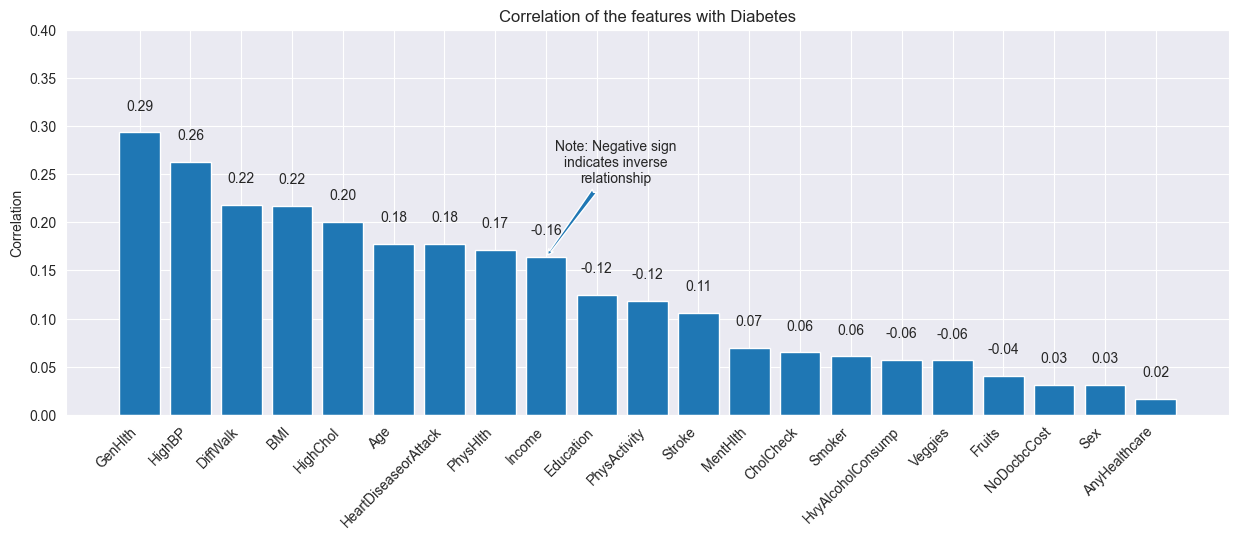

In [124]:
# Calculate the correlation coefficients
corr_values = diabetes.corr()['Diabetes_binary'].drop('Diabetes_binary')
abs_corr_values = abs(corr_values)
labels = corr_values.index

# Sort the correlation coefficients by absolute value in descending order
sort_index = np.argsort(abs_corr_values)[::-1]
labels = labels[sort_index]
abs_corr_values = abs_corr_values[sort_index]
corr_values = corr_values[sort_index]

#Set the style
sns.set_style('darkgrid')

# Create the bar plot
fig, ax = plt.subplots(figsize=(15, 5))
bars = ax.bar(labels, abs_corr_values)

# Add text labels to each bar
for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f"{corr_values[i]:.2f}", ha='center', va='bottom')
    if i == 8 and corr_values[i] < 0:
        ax.annotate('Note: Negative sign\nindicates inverse\nrelationship',
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    xytext=(50, 85), textcoords='offset points',
                    ha='center', va='top', arrowprops=dict(arrowstyle='fancy'))
        
ax.set_title('Correlation of the features with Diabetes')
ax.set_ylabel('Correlation')
ax.set_ylim([0, 0.4])
ax.set_xticklabels(labels = labels, rotation=45, ha='right')
plt.show()
